In [7]:
from __future__ import division
import nibabel as nib
import numpy as np
# Normal 
mr_img_normal = nib.load('../data/IXI365-Guys-0923-T1.nii')
# Defaced Mask
mr_img_defaced = nib.load('../data/IXI365-Guys-0923-T1_defaced.nii')
mr_img_pred = nib.load('../3dpreds/IXI365-Guys-0923-T1_pred.nii')

# GT Mask
# Predicted Mask 
norm_data = mr_img_normal.get_data()
def_data = mr_img_defaced.get_data()
mask_data = mr_img_pred.get_data()
print(norm_data.shape)
print(def_data.shape)
print(mask_data.shape)

# alternative_mask = np.swapaxes(np.squeeze(mask_data), 0, -1) 

# alternative_mask[alternative_mask < 0] = 0 
# alternative_mask[alternative_mask > 0] = 1


print(np.min(alternative_mask), np.max(alternative_mask))
print(np.min(mask_data), np.max(mask_data), np.percentile(mask_data, 68))
print(np.min(def_data), np.max(def_data)) 



(256, 256, 150)
(256, 256, 150)
(1, 160, 256, 256)
(0.0, 1.0)
(-0.040850177, 0.7793358, -0.04085017740726471)
(0.0, 1023.9999997615814)


In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from metrics import dice_coefficient

Using TensorFlow backend.


In [3]:
def resize_image(image):
    new_dims = tuple((image.shape[0] + (160 - image.shape[0]), image.shape[1], image.shape[2]))
    new_image = np.zeros(new_dims)
    new_image[:image.shape[0], :image.shape[1], :image.shape[2]] = image 
    return new_image

def normalize_img(image):
    means = np.mean(image)
    mins = np.min(image)
    maxs = np.max(image)
    norm_img = (image - means) / (maxs - mins + 1e-7)
    return norm_img 
    

In [8]:
# Compute dice coef. 
def_data = np.swapaxes(def_data, 0, -1)
mask_data = np.squeeze(mask_data)
def_data = resize_image(def_data) 
# mask_data = normalize_img(mask_data)
def_data = normalize_img(def_data) 
print(np.min(def_data), np.max(def_data)) 
print(np.min(mask_data), np.max(mask_data)) 
print(mask_data.shape)
print(def_data.shape)

print(np.percentile(mask_data, 70)) 
print('M S E : ', ((mask_data - def_data) ** 2).mean())

(-0.08631285598836336, 0.9136871439139804)
(-0.040850177, 0.7793358)
(160, 256, 256)
(160, 256, 256)
-0.04085017740726471
('M S E : ', 0.0034501358734092156)


In [167]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    mean_val = np.mean(x) 
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-mean_val)/(max_val-min_val + 1e-7)
    return norm_x


[1.00000000e-10 2.97635144e-10 8.85866790e-10 2.63665090e-09
 7.84759970e-09 2.33572147e-08 6.95192796e-08 2.06913808e-07
 6.15848211e-07 1.83298071e-06 5.45559478e-06 1.62377674e-05
 4.83293024e-05 1.43844989e-04 4.28133240e-04 1.27427499e-03
 3.79269019e-03 1.12883789e-02 3.35981829e-02 1.00000000e-01]
(256, 256, 160)
((256, 256, 160), (256, 256, 160))
('M S E : ', 0.0026537169446617815)


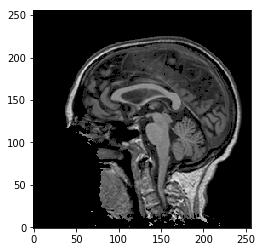

In [168]:
print(np.logspace(-10, -1, num=20))

print(alternative_mask.shape) 
norm_output = np.swapaxes(resize_image(np.swapaxes(norm_data, 0, -1)), 0, -1) 
defaced_output = np.swapaxes(alternative_mask, 0, -1) 
defaced_output = alternative_mask * norm_output 

def_data = np.swapaxes(def_data, 0, -1) 
def_data = np.swapaxes(resize_image(def_data), 0, -1)
print(defaced_output.shape, def_data.shape)


show_slice(defaced_output[:, :, 75])

defaced_output = normalize_img(defaced_output)
def_data = normalize_img(def_data)

print('M S E : ', ((defaced_output - def_data) ** 2).mean())

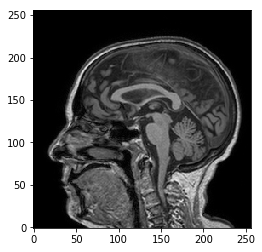

In [12]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data
show_slice(norm[:, :, 75])

0.7793358
-0.040850177
0


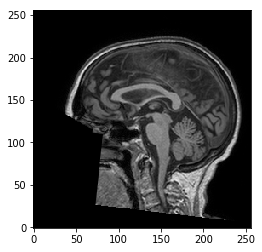

In [14]:
show_slice(def_data[:, :, 75])
print(np.max(mask_data))
print(np.min(mask_data))
print(len(np.where(mask_data == 1)[0])/np.prod(mask_data.shape))

(1, 160, 256, 256)
-0.040850177
0.7793358
-0.040850177


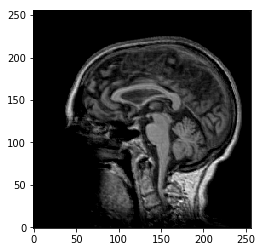

In [17]:
# Predicted
print(mask_data.shape)
mask_data = np.squeeze(mask_data)
mask_data = np.swapaxes(mask_data, 0, -1)
show_slice(mask_data[:, :, 75])
print(np.min(mask_data))
print(np.max(mask_data))
print(np.median(mask_data))
# print(np.percentile(pmask_data, 75))
# print(len(np.where(pmask_data == 1)[0]))

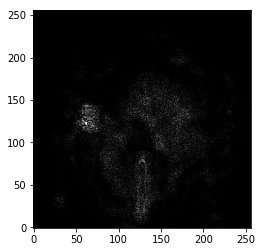

In [60]:
norm = norm_data
show_slice(norm)

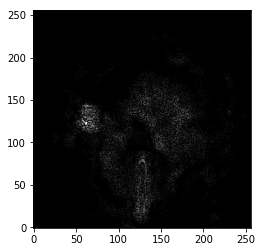

In [61]:
# Produce masked input via predicted mask
pred_applied_mask = np.multiply(normalizeImg(pmask_data[:, :, 0]), norm)


show_slice(pred_applied_mask)

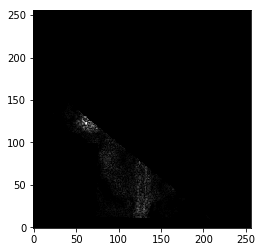

In [62]:
applied_mask = np.multiply(mask_data, norm)
show_slice(applied_mask)


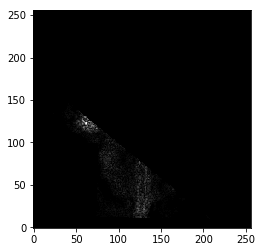

In [64]:
# Defaced
show_slice(def_data[:, :, 0])